In [1]:
import numpy as np
from dask.distributed import Client

client = Client(n_workers=4)

In [2]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [3]:
%%time

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 135 ms, sys: 35.5 ms, total: 170 ms
Wall time: 3.01 s


In [4]:
%%time

from dask import delayed

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

CPU times: user 1.17 ms, sys: 694 µs, total: 1.86 ms
Wall time: 1.4 ms


In [5]:
%%time

z.compute()

CPU times: user 238 ms, sys: 138 ms, total: 376 ms
Wall time: 2.29 s


5

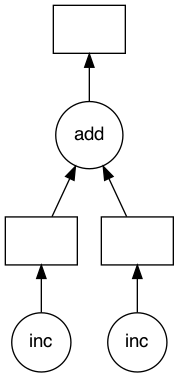

In [7]:
z.visualize()

In [8]:
data = [1,2,3,4,5,6,7,8]

In [9]:
%%time

result = []
for x in data:
    y = inc(x)
    result.append(y)

total = sum(result)

CPU times: user 406 ms, sys: 93.7 ms, total: 500 ms
Wall time: 8.02 s


In [10]:
total

44

In [11]:
%%time
result = []

for x in data:
    y = delayed(inc)(x)
    result.append(y)

total = delayed(sum)(result)
print("Before computing: ", total)
result = total.compute()
print("After computing: ", result)

Before computing:  Delayed('sum-256bba69-7af3-48fe-98f1-162558ac95f0')
After computing:  44
CPU times: user 73.4 ms, sys: 41.1 ms, total: 114 ms
Wall time: 1.08 s


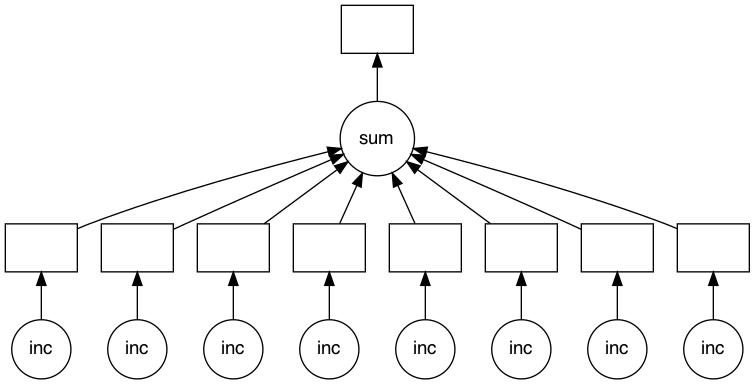

In [12]:
total.visualize()

In [13]:
def double(x):
    sleep(1)
    return x * 2

def is_even(x):
    return not x % 2

data = [1,2,3,4,5,6,7,8,9,10]

In [14]:
%%time
results = []
for x in data:
    if is_even(x):
        y = double(x)
    else:
        y = inc(x)
    results.append(y)

total = sum(results)
print(total)

90
CPU times: user 477 ms, sys: 108 ms, total: 585 ms
Wall time: 10 s


In [15]:
results = []
for x in data:
    if is_even(x):  # even
        y = delayed(double)(x)
    else:          # odd
        y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results)

%time total.compute()

CPU times: user 63.1 ms, sys: 14.1 ms, total: 77.2 ms
Wall time: 1.02 s


90

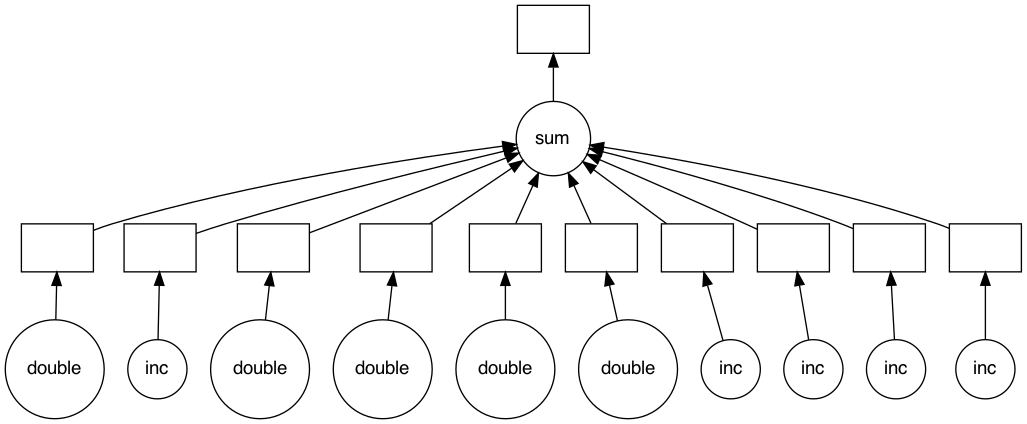

In [16]:
total.visualize()

In [18]:
%run prep.py -d flights

- Downloading NYC Flights dataset... done
- Extracting flight data... done
- Creating json data... done
** Created flights dataset! in 57.20s**


In [19]:
import os

sorted(os.listdir(os.path.join('data', 'nycflights')))

['1990.csv',
 '1991.csv',
 '1992.csv',
 '1993.csv',
 '1994.csv',
 '1995.csv',
 '1996.csv',
 '1997.csv',
 '1998.csv',
 '1999.csv']

In [20]:
import pandas as pd

df = pd.read_csv(os.path.join('data', 'nycflights', '1990.csv'))
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990,1,1,1,1621.0,1540,1747.0,1701,US,33,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990,1,2,2,1547.0,1540,1700.0,1701,US,33,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990,1,3,3,1546.0,1540,1710.0,1701,US,33,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990,1,4,4,1542.0,1540,1710.0,1701,US,33,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990,1,5,5,1549.0,1540,1706.0,1701,US,33,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


In [21]:
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum              float64
ActualElapsedTime    float64
CRSElapsedTime         int64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
Diverted               int64
dtype: object

In [22]:
df.Origin.unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [23]:
df.groupby('Origin').DepDelay.mean()

Origin
EWR     9.168411
JFK    11.857274
LGA     8.560045
Name: DepDelay, dtype: float64

In [24]:
from glob import glob

filenames = sorted(glob(os.path.join("data", "nycflights", "*.csv")))

In [27]:
%%time

sums = []
counts = []

for fn in filenames:
    df = pd.read_csv(fn)

    by_origin = df.groupby("Origin")
    total = by_origin.DepDelay.sum()
    count = by_origin.DepDelay.count()

    sums.append(total)
    counts.append(count)

total_delays = sum(sums)
n_flights = sum(counts)

mean = total_delays / n_flights

CPU times: user 3.37 s, sys: 656 ms, total: 4.03 s
Wall time: 3.91 s


In [28]:
mean

Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64

In [30]:
%%time
from dask import compute

sums = []
counts = []

for fn in filenames:
    df = delayed(pd.read_csv)(fn)

    by_origin = df.groupby('Origin')

    total = by_origin.DepDelay.sum()
    count = by_origin.DepDelay.count()

    sums.append(total)
    counts.append(count)

sums, counts = compute(sums, counts)

total_delays = sum(sums)
n_flights = sum(counts)
mean = total_delays / n_flights

CPU times: user 130 ms, sys: 21.1 ms, total: 152 ms
Wall time: 1.08 s


In [31]:
client.close()